# Individual Assignment 1: Data Description & Exploratory Data Analysis and Visualization

## Dataset Overview
- **Dataset Name**: UC Irvine Adult Dataset
- **Data Source**: 1994 U.S. Census database by Ronny Kohavi and Barry Becker, downloaded from https://archive.ics.uci.edu/ml/datasets/adult 
- **Total Observations**: 32,561
- **Total Variables**: 15

### Variables and Their Types

| Variable Index | Variable Name       | Type      | Description |
|----------------|---------------------|-----------|-------------|
| 0              | age                 | continuous       | Age of the individual |
| 1              | workclass           | categorical    | Employment sector (e.g., Private, Self-emp-not-inc, State-gov) |
| 2              | fnlwgt              | continuous       | Final weight, representing the number of people the observation represents in the population |
| 3              | education           | categorical    | Highest level of education attained |
| 4              | education-num       | continuous       | Numerical representation of education level |
| 5              | marital-status      | categorical    | Marital status (e.g., Never-married, Married-civ-spouse) |
| 6              | occupation          | categorical    | Type of occupation (e.g., Adm-clerical, Exec-managerial) |
| 7              | relationship        | categorical    | Relationship of the individual to the household (e.g., Husband, Not-in-family) |
| 8              | race                | categorical    | Race of the individual (e.g., White, Black) |
| 9              | sex                 | categorical    | Gender (Male/Female) |
| 10             | capital-gain        | continuous       | Capital gains earned |
| 11             | capital-loss        | continuous       | Capital losses incurred |
| 12             | hours-per-week      | continuous       | Average hours worked per week |
| 13             | native-country      | categorical    | Country of origin |
| 14             | income              | categorical    | Income level (<=50K, >50K) |

### Descriptive Statistics

- **Age**: Ranges from 17 to 90, with an average age of 38.6 years.
- **Education-num**: Has values from 1 to 16, representing various education levels.
- **Capital-gain**: Ranges from 0 to 99,999, with most values concentrated around zero, indicating that high capital gains are rare.
- **Capital-loss**: Similar to capital gain, most values are zero.
- **Hours-per-week**: Has a mean of 40.4 hours, aligning with typical full-time work expectations.
- **Income**: Target variable, classified into two categories: <=50K and >50K.

This dataset includes both categorical and numerical variables, making it suitable for exploring relationships between demographic attributes and income levels. Further exploration and preprocessing may involve handling missing values or encoding categorical features. We will start by loading the libraries needed:

In [1]:
# Run this cell before continuing.
library(broom)
library(repr)
library(infer)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(modelr)
library(tidyverse)
library(ggplot2)
library(dplyr)

Loading required package: Matrix

Loaded glmnet 4.1-8


Attaching package: ‘modelr’


The following objects are masked from ‘package:mltools’:

    mse, rmse


The following object is masked from ‘package:broom’:

    bootstrap


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ modelr::bootstrap() masks broom::bootstrap()
✖ dplyr::combine()    masks gridExtra::combine()
✖ tidyr::expand()     masks Matrix::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ modelr::mse()       masks mltools::mse()
✖ tidyr::pack()       masks Matrix::pack()
✖ tidyr::replace_na() masks mltools::replace_na()
✖ modelr::rmse()      masks mltools::rmse()
✖ lubridate::stamp(

Now we will load the dataset.

In [2]:
library(tidyverse)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Read the dataset
income <- read_csv(url, 
                   col_names = FALSE,
                    na = "?")

colnames(income) <- c(
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race",
    "sex", "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income"
)

head(income)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## **2. Research Question**

**_How does the number of hours worked per week influence the likelihood of an individual's annual income exceeding \$50,000?_**

### **Description of Variables**

- **Response Variable:**
  - Income (`income`): A binary categorical variable indicating whether an individual's annual income is **greater than \$50,000** (`>50K`) or **less than or equal to \$50,000(`<=50K`).

- **Explanatory Variable:**
  - Hours Worked Per Week (`hours_per_week`): A numerical variable representing the average number of hours an individual works each week.

<!-- The UC Irvine Adult Dataset provides information on individuals' work habits and income levels. By focusing on `hours_per_week` as the primary explanatory variable and `income` as the response variable, the dataset allows for an in-depth analysis of the relationship between work hours and income levels. 

- **Quantitative Analysis:** The numerical nature of `hours_per_week` facilitates statistical modeling to quantify its impact on the probability of earning >50K.
  
- **Binary Classification:** The categorical income variable aligns well with classification models, enabling the assessment of how variations in work hours influence income categorization.
 -->
### **Objective**

This research question encompasses both **prediction** and **inference**:

- **Prediction:** The goal is to develop a model that can predict the likelihood of an individual earning >50K based on their weekly work hours.
  
- **Inference:** Beyond prediction, the analysis seeks to understand the nature and strength of the relationship between work hours and income, providing insights into how changes in work patterns might influence earning potential.


In [3]:
# Convert income to a factor
income <- income %>%
  mutate(income = as.factor(income))

# Remove rows with missing values
income_clean <- income %>%
  drop_na()

summary(income_clean)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:30162       Min.   :  13769   Length:30162      
 1st Qu.:28.00   Class :character   1st Qu.: 117627   Class :character  
 Median :37.00   Mode  :character   Median : 178425   Mode  :character  
 Mean   :38.44                      Mean   : 189794                     
 3rd Qu.:47.00                      3rd Qu.: 237628                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:30162       Length:30162       Length:30162      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.12                                                           
 3rd Qu.:13.00                                                           
 Max.   :16.00                               

After removing missing values, the dataset now contains 30,162 observations. To simplify the analysis and ensure computational efficiency, we will proceed by sampling a subset of these observations. This will allow us to maintain manageable data size while preserving the representativeness of the dataset.

In [4]:
set.seed(1234)

income_sample <- income_clean %>%
  sample_n(1000)

head(income_sample)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
47,Private,120131,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
20,Federal-gov,147352,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
31,Local-gov,158092,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,35,United-States,<=50K
56,Private,178353,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
26,Private,137678,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


## 3. Exploratory Data Analysis and Visualization




Now, we will plot a boxplot to visualize and analyze the distribution of hours worked per week across different income groups (<=50K and >50K). This will help us understand the central tendency, variability, and presence of outliers in the working hours for each income category.

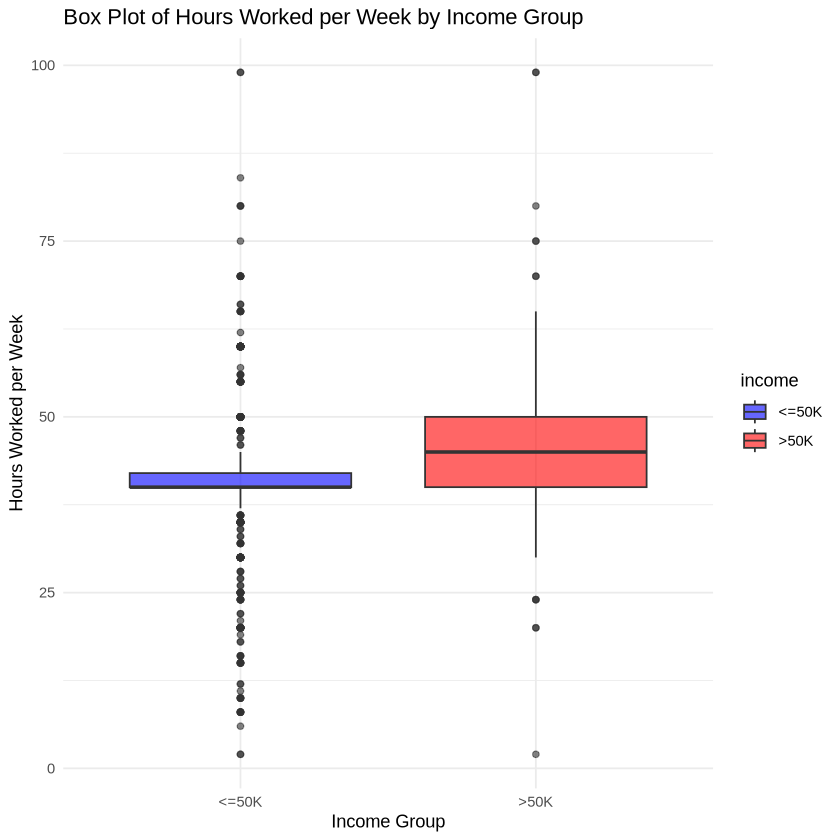

In [5]:

library(ggplot2)

ggplot(income_sample, aes(x = income, y = hours_per_week, fill = income)) +
  geom_boxplot(alpha = 0.6) +
  scale_fill_manual(values = c("<=50K" = "blue", ">50K" = "red")) +
  labs(title = "Box Plot of Hours Worked per Week by Income Group",
       x = "Income Group",
       y = "Hours Worked per Week") +
  theme_minimal()



### Findings

The box plot of hours worked per week, segmented by income group (`<=50K` and `>50K`), showed these key findings:

- Individuals with an income over 50K tend to work more hours on average than those earning less than or equal to 50K, as indicated by a higher median in the `>50K` group.
- The `<=50K` income group shows a wider spread in hours worked, with some individuals working significantly more than the standard full-time hours, as evidenced by a greater number of high outliers.

### Relevance of This Plot

This box plot is highly relevant for exploring the relationship between work hours and income for these reasons:

- The box plot format provides a straightforward view of the central tendency (median) and variability (interquartile range) for each income group, which helps to compare work-hour patterns between them.
- The plot effectively displays outliers, showing that some individuals in the `<=50K` group work unusually high hours.
- This plot allows us to observe if certain work-hour ranges correlate with income levels, helping identify any potential patterns, such as why certain individuals work long hours at lower income levels.

### Potential Problems

While this plot is informative, there are potential challenges and limitations:

- The presence of many outliers could skew interpretations of typical hours worked. These outliers might need to be analyzed separately to understand if they represent unique cases.
- If the distribution of hours worked is not normal within each income group, standard summary statistics (like median) may not fully capture the differences in work patterns between groups.
- If the income groups are not of equal size, this could affect the interpretation of spread and outliers. For example, a larger `<=50K` group might show more variability simply due to the larger sample size.


# Individual Assignment 2: Reflection after first deliverable

Upon further reflection, I realized the need to incorporate more explanatory variables to capture the complexity of the relationship between individual characteristics and income levels. As a result, I have refined the research question to::
How do demographic factors (such as age and years of education) predict the likelihood of an individual's annual income exceeding $50,000?

To streamline the analysis and concentrate on the most relevant variables, I have updated the dataset by excluding columns that do not directly contribute to addressing our research question. Specifically:
- fnlwgt: This variable represents the final weight, indicating the number of people each observation stands for in the population. However, it does not provide meaningful insights into the individual's income potential and thus is not useful for our predictive analysis.
- native_country: This variable causes challenges due to its high cardinality, which includes numerous countries of origin. Including it would introduce unnecessary complexity, therefore, it is excluded to maintain focus on more impactful demographic factors.
- education_num: This variable is a numerical representation of the education level, so its inclusion alongside the education variable (categorical representation of education level) can lead to redundancy and multicollinearity in the model.

By removing these variables, the analysis will become more manageable and focused, allowing for a clearer understanding of how key demographic factors influence the likelihood of earning over $50,000 annually.

In [6]:
income_sample <- income_sample %>%
  select(-native_country, -fnlwgt, -education_num) 

head(income_sample)

age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
47,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,<=50K
28,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,<=50K
20,Federal-gov,HS-grad,Never-married,Other-service,Not-in-family,White,Female,0,0,40,<=50K
31,Local-gov,Some-college,Never-married,Adm-clerical,Own-child,White,Female,0,0,35,<=50K
56,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,>50K
26,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male,0,0,40,<=50K


# Methods and Plan

## Proposed Method: Logistic Regression with Backward Selection, Comparison of AIC between the reduced and full model, and using the ROC Curve to assess model performance

- Why is this method appropriate?

Logistic regression is appropriate for modeling binary outcome variables, such as the income categories in this dataset (<=50K and >50K). It allows for the estimation of the probability that an individual falls into a particular income category based on multiple predictor variables. Since our research question is about understanding the influence of several demographic factors on income, logistic regression would be an appropriate method for both prediction and inference.

Backward selection is appropriate, as it is a stepwise regression technique that begins with a model containing all candidate predictor variables. It iteratively removes the least significant variable based on the p-value, and only the variables that contribute meaningfully to the model will remain. This method is beneficial in identifying the most impactful demographic factors without overcomplicating the model with unnecessary variables.

Then, we would fit a full logistic regression model using all relevant demographic predictors.
Apply backward selection to iteratively remove non-significant variables, refining the model to include only those predictors that have a meaningful impact on income levels.

Finally, we will assess the reduced model's performance using AUC and check for adherence to logistic regression assumptions. We will then analyze the selected variables to understand their influence on the likelihood of earning >50K, providing both predictive insights and inferential conclusions.


- Which assumptions are required, if any, to apply the method selected?

We will assume that each income status is independent of other observations. We will also be assuming that predictor variables are not highly correlated with one another. Moreover, we are also assuming that the sample size is large enough to provide reliable estimates for the predictors. 

- What are the potential limitations or weaknesses of the method selected?

Some potential limitations of the method selected include overfitting. Including too many predictors might lead to a model that performs well on training data but not on unseen data. However, we have also used backward selection to reduce the number of variables and minimize overfitting.
Another possible weakness of this method is that backward selection typically evaluates variables individually and may miss interaction effects between predictors. 

## Proposed Plan:
- Fit a full logistic regression model with all relevant demographic predictors included.
- Apply backward selection and iteratively remove non-statistically significant variables, and only retain predictors that have significant impacts on income levels.
- Evaluate the reduced model and compare it with the initial full model by using Akaike Information Criterion (AIC) to identify the model that best balances fit and complexity.
- Evaluate the model with the better AIC using the Area Under the Curve (AUC) to assess the model's performance and measure its ability to distinguish between income groups effectively.

By using this approach, we will develop a model that accurately represents the relationship between demographic characteristics and income levels.

# Implementation of a proposed model

We will now start with fitting a full logistic regression model using all relevant predictors. Before that, we will also avoid the dummy variable trap by using the model.matrix function.

In [7]:
design_matrix <- model.matrix(~ . - income - 1, data = income_sample)

dummy_df <- as.data.frame(design_matrix)

# Clean column names by replacing special characters
names(dummy_df) <- make.names(names(dummy_df), unique = TRUE)

# Add back the original income column
dummy_df$income <- income_sample$income

selected_vars <- colnames(dummy_df)[grep("^(age|education|occupation|relationship|capital_gain|capital_loss|hours_per_week)", colnames(dummy_df))]

# Create the formula with cleaned variable names
formula_reduced <- as.formula(paste("income ~", paste(selected_vars, collapse = " + ")))

# Fit the model
full_model <- glm(formula_reduced, data = dummy_df, family = binomial)

summary(full_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = formula_reduced, family = binomial, data = dummy_df)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -2.082e+01  1.116e+03  -0.019 0.985114    
age                          3.552e-02  9.364e-03   3.793 0.000149 ***
education11th                1.485e+01  1.116e+03   0.013 0.989377    
education12th                6.233e-01  1.722e+03   0.000 0.999711    
education1st.4th             1.564e+01  1.116e+03   0.014 0.988815    
education5th.6th             5.225e-01  2.758e+03   0.000 0.999849    
education7th.8th             1.435e+01  1.116e+03   0.013 0.989738    
education9th                 5.542e-01  1.885e+03   0.000 0.999765    
educationAssoc.acdm          1.704e+01  1.116e+03   0.015 0.987817    
educationAssoc.voc           1.740e+01  1.116e+03   0.016 0.987560    
educationBachelors           1.700e+01  1.116e+03   0.015 0.987846    
educationDoctorate           1.906e+01  1.116e+03   0.017 0

### Next, we will perform a backward selection using the leaps::regsubsets() function. 


In [8]:
backward_sel <- regsubsets(
  x =  income ~ ., nvmax = 13,
  data = income_sample,
  method = "backward"
)

backward_sel_summary <- summary(backward_sel)

backward_sel_summary

Subset selection object
Call: regsubsets.formula(x = income ~ ., nvmax = 13, data = income_sample, 
    method = "backward")
53 Variables  (and intercept)
                                    Forced in Forced out
age                                     FALSE      FALSE
workclassLocal-gov                      FALSE      FALSE
workclassPrivate                        FALSE      FALSE
workclassSelf-emp-inc                   FALSE      FALSE
workclassSelf-emp-not-inc               FALSE      FALSE
workclassState-gov                      FALSE      FALSE
workclassWithout-pay                    FALSE      FALSE
education11th                           FALSE      FALSE
education12th                           FALSE      FALSE
education1st-4th                        FALSE      FALSE
education5th-6th                        FALSE      FALSE
education7th-8th                        FALSE      FALSE
education9th                            FALSE      FALSE
educationAssoc-acdm                     FALSE  

### From the results of our backward selection, we can now use the selected variables to fit the model once again.


In [9]:
names(dummy_df)

selected_vars <- c(
  "age", 
  "workclassSelf.emp.not.inc",
  "educationAssoc.voc",
  "educationBachelors", 
  "educationMasters", 
  "educationProf.school",
  "educationSome.college", 
  "marital_statusMarried.civ.spouse",
  "occupationExec.managerial", 
  "occupationSales", 
  "capital_gain", 
  "hours_per_week"
)

# Create formula with selected variables
formula_reduced <- as.formula(paste("income ~", paste(selected_vars, collapse = " + ")))

# Fit reduced model
reduced_model <- glm(formula_reduced, data = dummy_df, family = binomial)

# View summary
summary(reduced_model)

[1] "age"                                 "workclassFederal.gov"               
 [3] "workclassLocal.gov"                  "workclassPrivate"                   
 [5] "workclassSelf.emp.inc"               "workclassSelf.emp.not.inc"          
 [7] "workclassState.gov"                  "workclassWithout.pay"               
 [9] "education11th"                       "education12th"                      
[11] "education1st.4th"                    "education5th.6th"                   
[13] "education7th.8th"                    "education9th"                       
[15] "educationAssoc.acdm"                 "educationAssoc.voc"                 
[17] "educationBachelors"                  "educationDoctorate"                 
[19] "educationHS.grad"                    "educationMasters"                   
[21] "educationPreschool"                  "educationProf.school"               
[23] "educationSome.college"               "marital_statusMarried.civ.spouse"   
[25] "marital_statusMarried.spouse.absent" "marital_statusNever.married"        
[27] "marital_statusSeparated"             "marital_statusWidowed"              
[29] "occupationArmed.Forces"              "occupationCraft.repair"             
[31] "occupationExec.managerial"           "occupationFarming.fishing"          
[33] "occupationHandlers.cleaners"         "occupationMachine.op.inspct"        
[35] "occupationOther.service"             "occupationPriv.house.serv"          
[37] "occupationProf.specialty"            "occupationProtective.serv"          
[39] "occupationSales"                     "occupationTech.support"             
[41] "occupationTransport.moving"          "relationshipNot.in.family"          
[43] "relationshipOther.relative"          "relationshipOwn.child"              
[45] "relationshipUnmarried"               "relationshipWife"                   
[47] "raceAsian.Pac.Islander"              "raceBlack"                          
[49] "raceOther"                           "raceWhite"                          
[51] "sexMale"                             "capital_gain"                       
[53] "capital_loss"                        "hours_per_week"                     
[55] "income"


Call:
glm(formula = formula_reduced, family = binomial, data = dummy_df)

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -6.916e+00  6.325e-01 -10.936  < 2e-16 ***
age                               3.322e-02  8.552e-03   3.885 0.000102 ***
workclassSelf.emp.not.inc        -9.295e-01  3.556e-01  -2.614 0.008955 ** 
educationAssoc.voc                1.489e+00  4.973e-01   2.995 0.002747 ** 
educationBachelors                1.145e+00  2.722e-01   4.207 2.59e-05 ***
educationMasters                  2.071e+00  4.213e-01   4.917 8.80e-07 ***
educationProf.school              2.986e+00  8.110e-01   3.682 0.000232 ***
educationSome.college             4.893e-01  2.638e-01   1.855 0.063563 .  
marital_statusMarried.civ.spouse  2.746e+00  2.541e-01  10.809  < 2e-16 ***
occupationExec.managerial         8.802e-01  2.797e-01   3.147 0.001652 ** 
occupationSales                   8.778e-01  2.766e-01   3.173 0.001508 ** 


## Analyzing the results 
From the results of the reduced model, we can see that the reduced model with fewer predictors has a higher AIC value (674.03) as compared to the full model (668.54), suggesting that the initial full model provides a more efficient representation of the relationship between the predictors and the income variable. This means that the retained predictors capture the most important characteristics of the data while avoiding excessive complexity. However, any limitations like as multicollinearity or omitted variable bias should be evaluated and resolved.


## Assessing the Full Model Performance with the ROC curve

To evaluate the performance of our model, we will use the ROC (Receiver Operating Characteristic) curve, which provides a visual representation of the trade-off between sensitivity (true positive rate) and specificity (false positive rate) across different classification thresholds. The curve helps us understand how well the model discriminates between the two income groups (<=50K and >50K).

Additionally, we will calculate the AUC (Area Under the Curve), a metric that quantifies the overall model performance. An AUC value closer to 1 indicates excellent discrimination, while a value near 0.5 suggests random guessing.

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = <=50K, case = >50K

Setting direction: controls < cases



Area under the curve: 0.9164


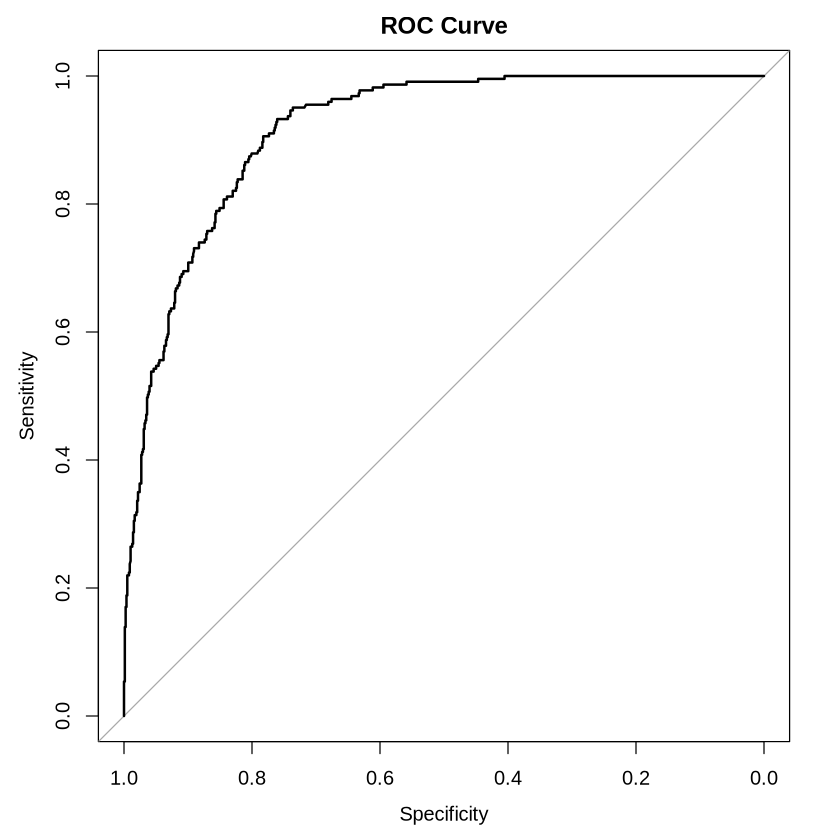

In [10]:
# Install and load pROC package
install.packages("pROC")
library(pROC)

actual_classes <- dummy_df$income
predicted_probs <- predict(full_model, type = "response")

# Calculate ROC curve
roc_curve <- roc(actual_classes, predicted_probs)

# Plot ROC curve
plot(roc_curve, main = "ROC Curve")

# Calculate AUC
auc_value <- auc(roc_curve)
print(auc_value)

The AUC (Area Under the Curve) value we obtained, 0.9164, is significantly above 0.5, which indicates that our model performs better than random guessing. This also suggests that the model has strong discriminatory power and can reliably predict whether an individual's income exceeds $50,000 based on the selected predictors. This demonstrates the robustness of our model and its practical applicability in analyzing the relationship between demographic factors and income levels.